**IMPORTING PACKAGES**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,RocCurveDisplay
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

**READING ADN EXPLORING THE DATA**

In [7]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**SETTING COLUMNS TO LOWER LETTER JUST FOR MY CONVENIENCE**

In [13]:
df_train.set_index('PassengerId',inplace=True)
df_test.set_index('PassengerId',inplace=True)


In [14]:
df_train.columns=df_train.columns.str.lower() # for my convenience x_testD
df_test.columns=df_test.columns.str.lower()

**SEEING THE DATA WE HAVE IN HAND**

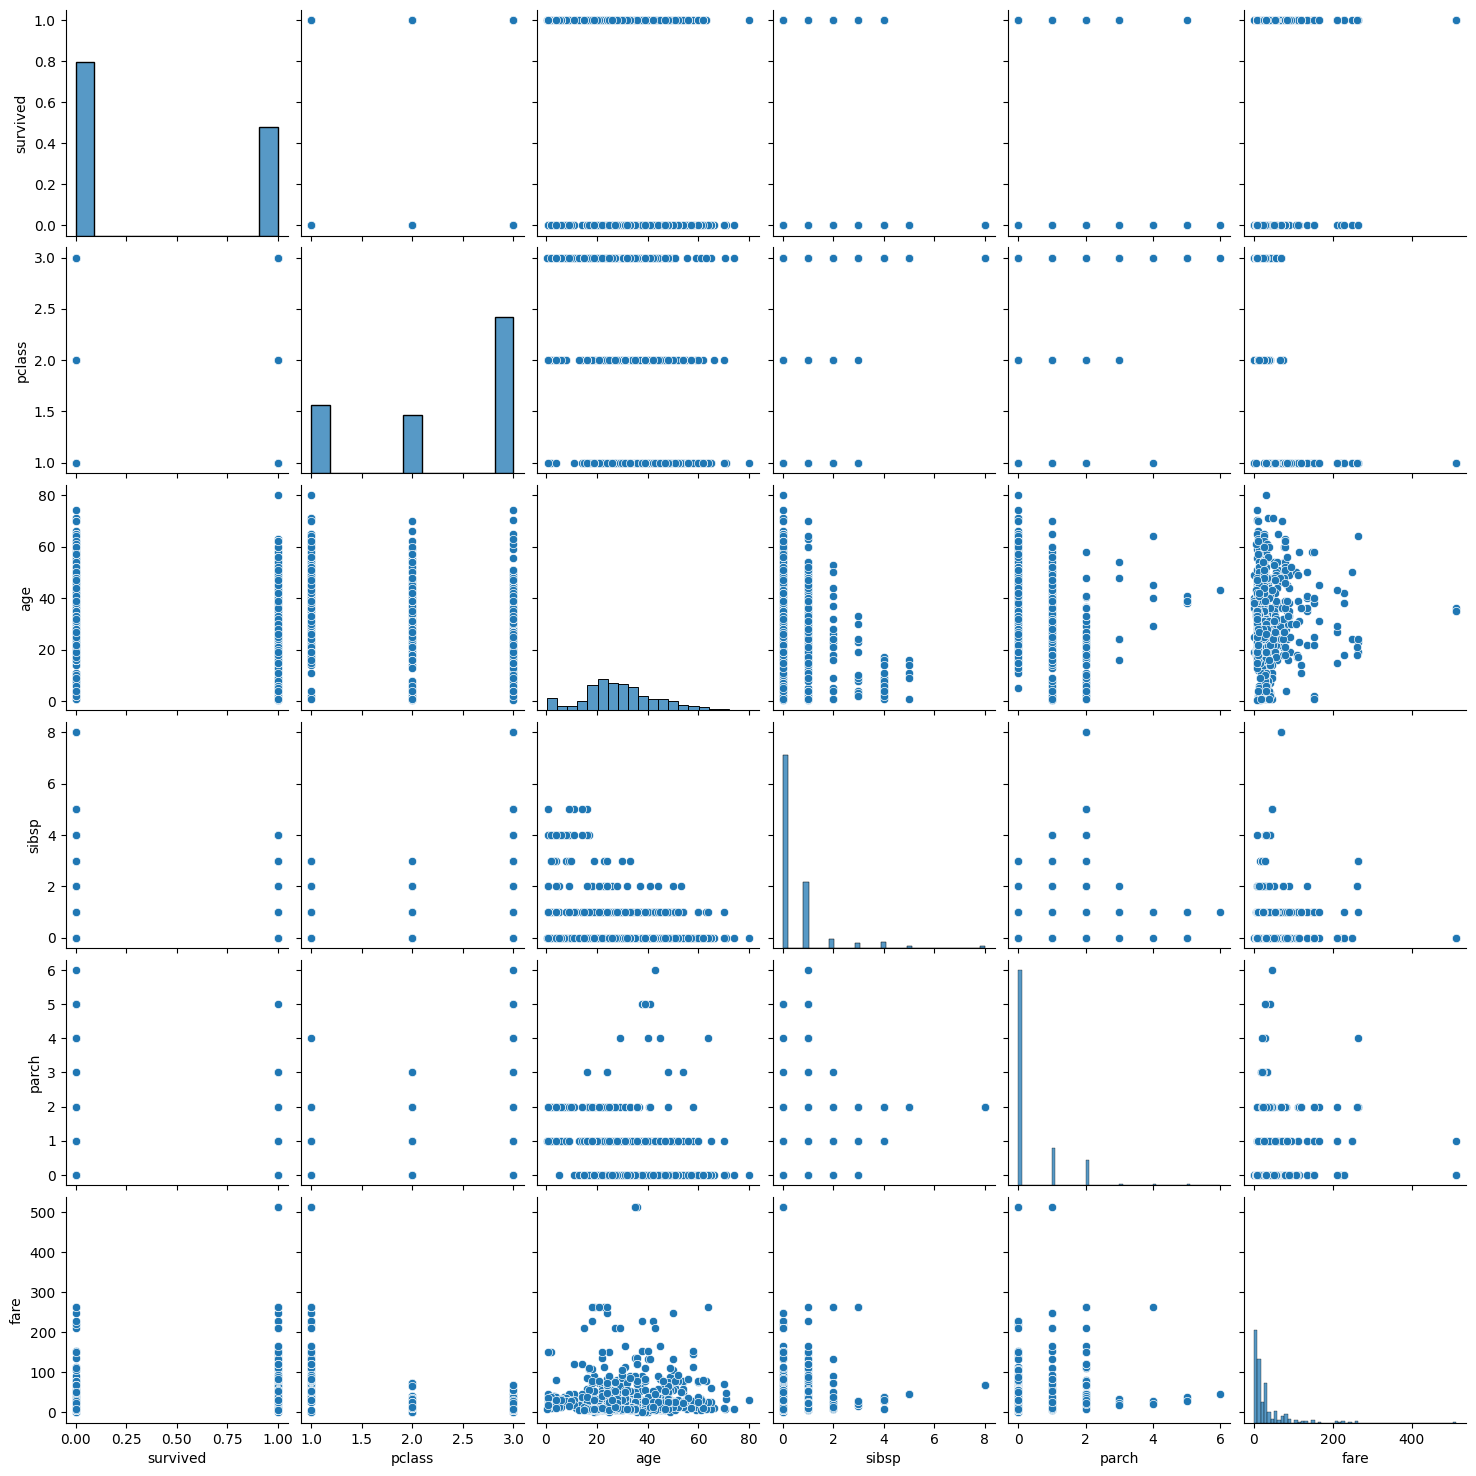

In [15]:
sns.pairplot(data=df_train)

**CHECKING THE CABIN COLUMN SINCE IT HAS SO MANY NANs** =====
**PEOPLE WITH NO CABINS HAVE LOWER CHANCES OF SURVIVNG**

In [16]:
df_train['cabin'].isna().sum(), df_train.loc[df_train['cabin'].isna(),'survived'].sum()


(np.int64(687), np.int64(206))

**EXTRACTING THE INTTIALS OF CABINS NAMES SINCE THE INTIALS CONVEY INFORMATION ABOUT THE STATUS OF THE RESIDENTS**

In [17]:
df_train['cabin_initals']=np.where(df_train['cabin'].notnull(),df_train['cabin'].str.split().str[0].str[0],'no_cabin')
df_test['cabin_initals']=np.where(df_test['cabin'].notnull(),df_test['cabin'].str.split().str[0].str[0],'no_cabin')
df_test['cabin_initals'].nunique()

8

In [18]:
df_train['cabin_initals'].value_counts()

cabin_initals
no_cabin    687
C            59
B            47
D            33
E            32
A            15
F            13
G             4
T             1
Name: count, dtype: int64

In [19]:
df_test['cabin_initals'].value_counts()

cabin_initals
no_cabin    327
C            35
B            18
D            13
E             9
F             8
A             7
G             1
Name: count, dtype: int64

**CONVERTING THE CABINS COLUMN FROM MULTIVALUED TO BINARY (CABIN OR NO CABIN)**

In [20]:
df_train.loc[df_train['cabin'].notnull(),'cabin']='has_cabin'
df_train.loc[df_train['cabin'].isna(),'cabin']='no_cabin'
df_test.loc[df_test['cabin'].notnull(),'cabin']='has_cabin'
df_test.loc[df_test['cabin'].isna(),'cabin']='no_cabin'

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   name           891 non-null    object 
 3   sex            891 non-null    object 
 4   age            714 non-null    float64
 5   sibsp          891 non-null    int64  
 6   parch          891 non-null    int64  
 7   ticket         891 non-null    object 
 8   fare           891 non-null    float64
 9   cabin          891 non-null    object 
 10  embarked       889 non-null    object 
 11  cabin_initals  891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


**FILLING THE EMBARKED COUPLE VALUES MISSING WITH THE MODE**

In [22]:
df_train['embarked']=df_train['embarked'].fillna(df_train['embarked'].mode()[0])
df_test['embarked']=df_test['embarked'].fillna(df_train['embarked'].mode()[0])

**EXTRACTING THE TITLE FROM THE NAMES SINCE THE TITLE CONVEYS INFO ABOUT THE AGE ,STATUS AND THE SEX OF TEH PASSENGER AND IT WILL BE USEFUL**

In [23]:
df_train['title']=df_train['name'].str.split(',').str[1].str.split().str[0].str.split('.').str[0]
df_test['title']=df_test['name'].str.split(',').str[1].str.split().str[0].str.split('.').str[0]

In [24]:
df_train['title'].value_counts()

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
the           1
Jonkheer      1
Name: count, dtype: int64

In [25]:
df_test['title'].value_counts()

title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

**COLLAPSING CATEGORIES TO 4 MAJOR CALSSES AND ONE RARE**

In [26]:
df_train.loc[(df_train['title']!='Mr') & (df_train['title']!='Mrs') & (df_train['title']!='Miss') & (df_train['title']!='Master'),'title'] ='rare'
df_test.loc[(df_test['title']!='Mr') & (df_test['title']!='Mrs') & (df_test['title']!='Miss') & (df_test['title']!='Master'),'title'] ='rare'


In [27]:
df_train['title'].value_counts()

title
Mr        517
Miss      182
Mrs       125
Master     40
rare       27
Name: count, dtype: int64

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   name           891 non-null    object 
 3   sex            891 non-null    object 
 4   age            714 non-null    float64
 5   sibsp          891 non-null    int64  
 6   parch          891 non-null    int64  
 7   ticket         891 non-null    object 
 8   fare           891 non-null    float64
 9   cabin          891 non-null    object 
 10  embarked       891 non-null    object 
 11  cabin_initals  891 non-null    object 
 12  title          891 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 97.5+ KB


**ANALYSING THE NUMBER OF PARENTS AND SIBLINGS ON BOARD TO SEE  IF THERE IS A RELATION BETWEEN FAMILY SIZE AND SURVIVAL RATES,WHICH THERE SHOULD BE BECUASE HUMANS TEND TO STICK TO THIER PACKS SO IF THE FAMILY SIZE IS KINDA SMALL TO MODERATE IT WILL TRNASLATE TO HIGHER SURVIVAL RATES THAN BIGGER FAMILIES, BECUASE BIGGER PACKS WILL HAVE  A HARDER TTIME COORDINATING AND FOCUSING UDNER SUCH AN INTENSE SITUATION**

<Axes: xlabel='parch', ylabel='survived'>

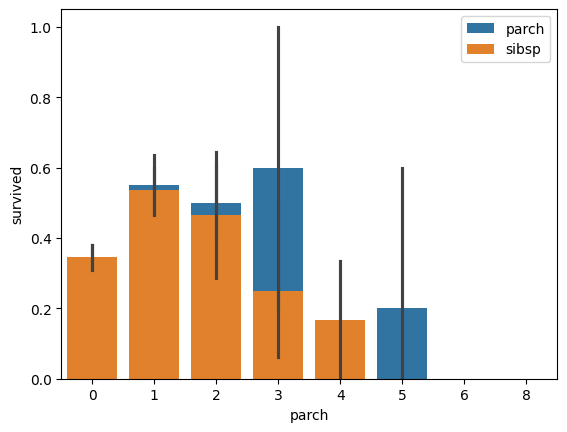

In [29]:
sns.barplot(data=df_train,x='parch',y='survived',label='parch')
sns.barplot(data=df_train,x='sibsp',y='survived',label='sibsp')

In [834]:
df_train['family_size']=df_train['parch']+df_train['sibsp']+1
df_test['family_size']=df_test['parch']+df_test['sibsp']+1


<Axes: xlabel='family_size', ylabel='survived'>

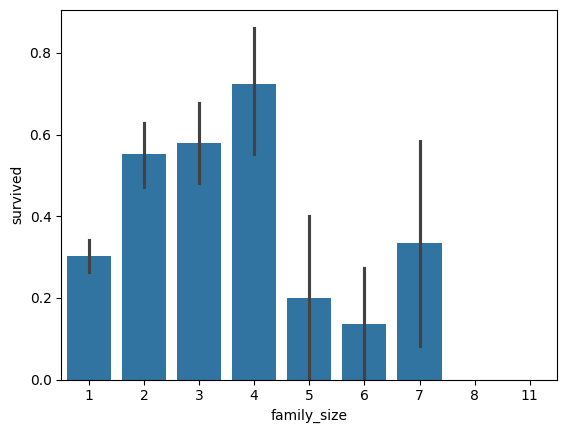

In [835]:
sns.barplot(data=df_train,x='family_size',y='survived')

In [836]:
df_train.drop(['parch','sibsp'],axis=1,inplace=True)
df_test.drop(['parch','sibsp'],axis=1,inplace=True)

**TO FILL THE MISSING AGE VALUES WE GROUP THE PASSENGERS BY THIER TITLES AND CLASSES SINCE THESE TWO FEATURES TOGETHER CAN APPROXIMATE SOMEONES AGE PRETTY ACCURATELY**

In [837]:
df_train[['title','age','pclass']].groupby(['title','pclass']).median()

age
title  pclass      
Master 1        4.0
       2        1.0
       3        4.0
Miss   1       30.0
       2       24.0
       3       18.0
Mr     1       40.0
       2       31.0
       3       26.0
Mrs    1       41.5
       2       32.0
       3       31.0
rare   1       45.0
       2       42.0

**WE FILL WITH THE MEDIAN AGE PER GIVEN TITLE PER GIVEN CLASS**

In [838]:
df_train['age'] = df_train['age'].fillna(df_train.groupby(['title', 'pclass'])['age'].transform('median'))
df_test['age'] = df_test['age'].fillna(df_test.groupby(['title', 'pclass'])['age'].transform('median'))


**WE STILL HAVE ONE MISSING AGE AND FARE DATAPOINT DUE TO MAYBE SOME PERSON X WITH CLASS Y AND TITLE Z IS UNIQUE AND THERE IS NO OTHER PERSON SHARING THE SAME CHARACTERSTIICS WHICH WILL RETURN THE MEDIAN AS NAN OFCOURSE SO WE REFILL IT AGAIN WITH THE MEDIAN VALUES**

In [839]:
df_test['fare'].isna().sum() , df_test['age'].isna().sum()

(np.int64(1), np.int64(1))

In [840]:
df_test['age'] = df_test['age'].fillna(df_test['age'].median())
df_test['fare'] = df_test['fare'].fillna(df_test['age'].median())

In [841]:
df_test['fare'].isna().sum() , df_test['age'].isna().sum()

(np.int64(0), np.int64(0))

**DISCRETIZING AGE AND FARE VALUES TO BETTER SEPERATE THE PASSENGERS AND DEAL WITH OUTLIERS IN TEH FARE CATEGOR**

In [842]:
fare_bins = pd.qcut(df_train['fare'],q=7,retbins=True,duplicates='drop')[1]
age_bins  = pd.cut(df_train['age'],bins=6,retbins=True,duplicates='drop')[1]
df_train['fare'] = pd.cut(df_train['fare'], bins=fare_bins, labels=False, include_lowest=True)
df_train['age']  = pd.cut(df_train['age'], bins=age_bins,  labels=False, include_lowest=True)
df_test['fare']  = pd.cut(df_test['fare'], bins=fare_bins, labels=False, include_lowest=True)
df_test['age']   = pd.cut(df_test['age'], bins=age_bins,  labels=False, include_lowest=True)

In [843]:
fare_bins

array([  0.    ,   7.75  ,   8.05  ,  12.475 ,  19.2583,  27.9   ,
        56.9292, 512.3292])

<Axes: xlabel='age', ylabel='survived'>

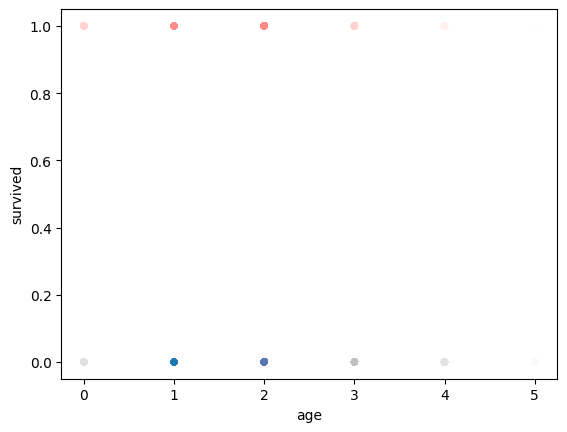

In [844]:
sns.scatterplot(x=df_train['age'],y=df_train['survived'],hue=df_train['survived'],alpha=0.005,legend=False)

<Axes: xlabel='fare', ylabel='survived'>

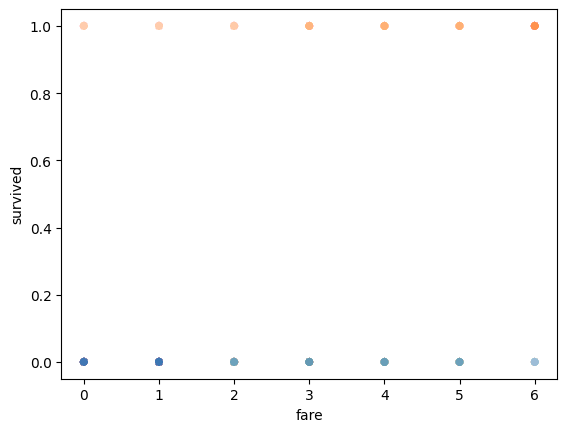

In [845]:
sns.scatterplot(x=df_train['fare'],y=df_train['survived'],hue=df_train['survived'],alpha=0.01,legend=False)


**SEPERATING THE TARGET AS Y**

In [846]:
y=df_train['survived']
y.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

**ENCODING CATEGORICAL COLUMNS WITH ONE HOT ENCODING**

In [847]:
x_train=df_train.drop(['survived','name','ticket'],axis=1)
x_test=df_test.drop(['name','ticket'],axis=1)
cat_train=x_train.select_dtypes(include="O").columns.tolist()
num_train=x_train.select_dtypes(exclude="O").columns.tolist()

In [848]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,drop='first')
ohe.fit(x_train[cat_train])
encoded_cat_train=ohe.transform(x_train[cat_train])
encoded_cat_train=pd.DataFrame(encoded_cat_train)
encoded_cat_train.index=range(1,892)
x_processed_train=pd.concat([x_train[num_train],encoded_cat_train],axis=1)

In [849]:
x_processed_train

,pclass,age,fare,family_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,3,1,0,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,2,6,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1,2,5,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3,2,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,2,3,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,1,1,5,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
889,3,1,4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
890,1,1,5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [850]:
cat_test=x_test.select_dtypes(include="O").columns.tolist()
num_test=x_test.select_dtypes(exclude="O").columns.tolist()
encoded_cat_test=ohe.transform(x_test[cat_test])
encoded_cat_test=pd.DataFrame(encoded_cat_test)
encoded_cat_test.index=range(892,1310)
x_processed_test=pd.concat([x_test[num_test],encoded_cat_test],axis=1)

In [851]:
x_processed_test.isna().sum()
x_processed_test.fillna(x_processed_test.median(),inplace=True)

In [852]:
x_processed_train.columns=x_processed_train.columns.astype(str)
x_processed_test.columns=x_processed_test.columns.astype(str)

**SPLITING THE DATA INTO TRAIN AND TEST SPLITS TO VALIDATE THE MODEL AND CAPTURE OVERFITTING IF PRESENT**

In [853]:
x_train,x_test,y_train,y_test = train_test_split(x_processed_train,y, test_size=0.25, random_state=42,stratify=y,shuffle=True)

**TRYING WITH LOGISITC REGRESSION**

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       137
           1       0.72      0.81      0.77        86

    accuracy                           0.81       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.81      0.81      0.81       223

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       412
           1       0.74      0.82      0.78       256

    accuracy                           0.82       668
   macro avg       0.81      0.82      0.82       668
weighted avg       0.83      0.82      0.82       668



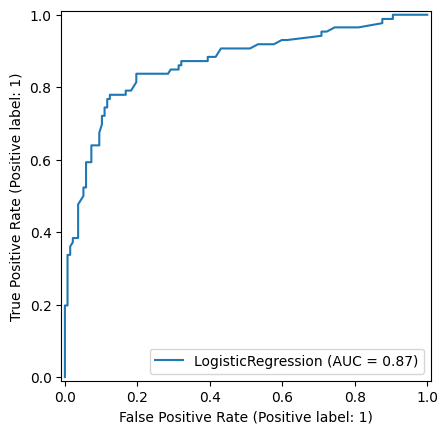

In [930]:
lgtry=LogisticRegression(penalty='l1',C=5000,max_iter=10**5,solver='saga',class_weight="balanced")
lgtry.fit(x_train,y_train)
print(classification_report(y_test,lgtry.predict(x_test)))
print(classification_report(y_train,lgtry.predict(x_train)))
RocCurveDisplay.from_estimator(lgtry,x_test,y_test)


In [855]:
def models_sweep(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    print(f'{model} results:')
    print(classification_report(y_test,model.predict(x_test)))
    RocCurveDisplay.from_estimator(model,x_test,y_test)
    print('============================================================')

**LOOPING NTHROUGH DIFFRENT MODEL TO ASSESS THIER INTIAL RAW PERFORMANCE**

LogisticRegression() results:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       137
           1       0.76      0.74      0.75        86

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

DecisionTreeClassifier() results:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       137
           1       0.72      0.66      0.69        86

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223

SVC() results:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       137
           1       0.79      0.74      0.77        86

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81      

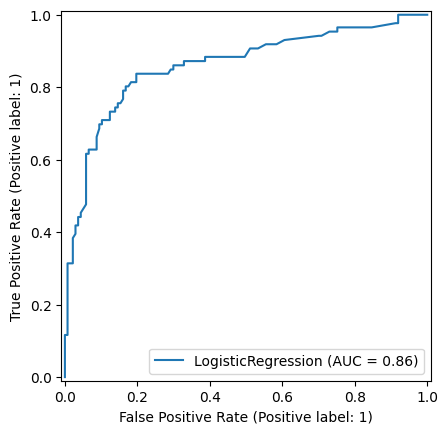

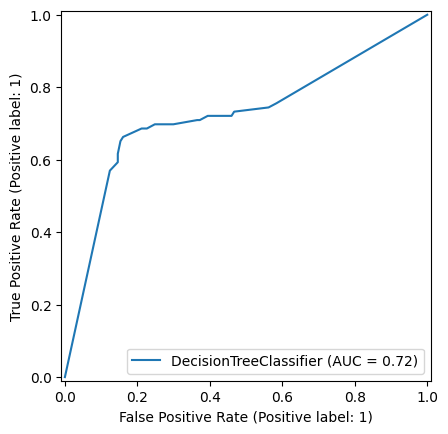

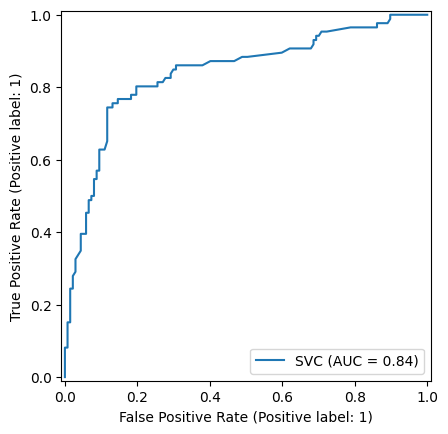

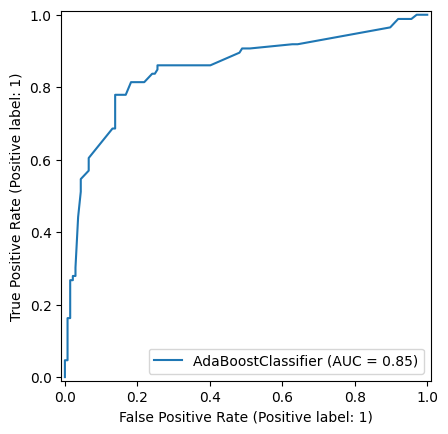

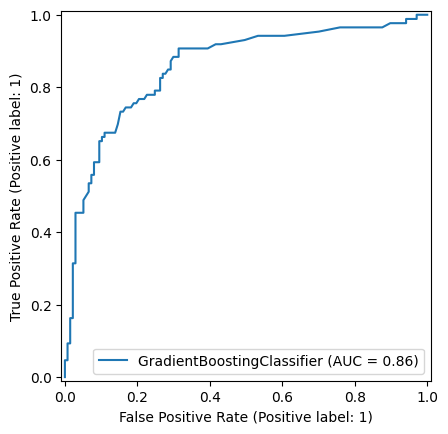

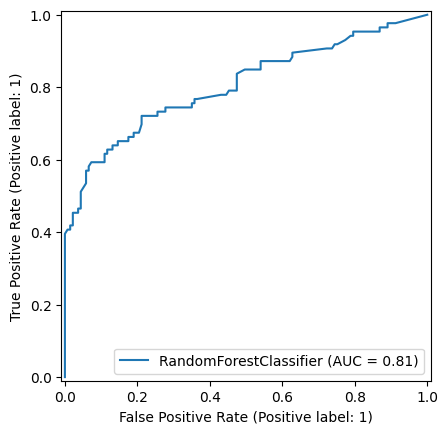

In [856]:
for model in [LogisticRegression(),DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier()]:
    models_sweep(model,x_train,y_train,x_test,y_test)

**DIVING INTI LOGISITIC REGRESSION AGAIN BUT THIS TIME WITH MORE PARAMETERS SWEEP ADN CROSS VALIDATION**

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       137
           1       0.74      0.83      0.78        86

    accuracy                           0.82       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.82      0.82       223



array([1.])

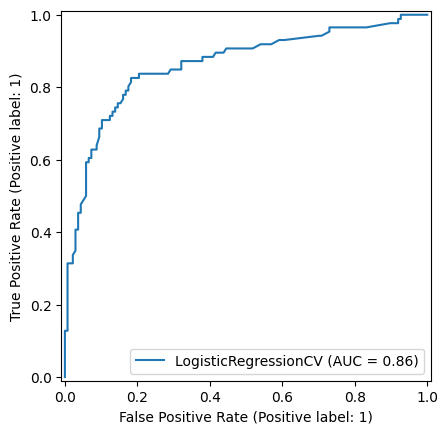

In [ ]:
lg=LogisticRegressionCV(max_iter=10**5,solver='saga',class_weight="balanced",penalty='elasticnet',l1_ratios=[0,0.1,0.5,0.9,1],Cs=5,scoring="roc_auc")

models_sweep(lg,x_train,y_train,x_test,y_test)
lg.C_

**GRIDSEARCHING OVER GRADIENTBOOST HYBERPARAMETERS**

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       137
           1       0.79      0.65      0.71        86

    accuracy                           0.80       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223



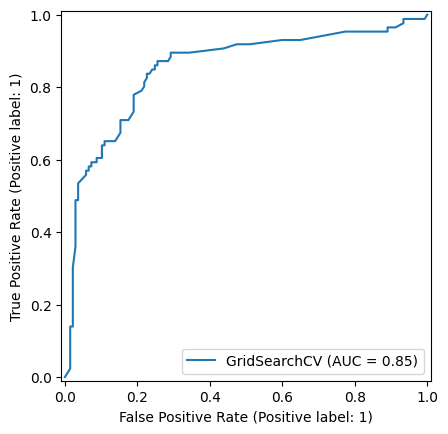

In [ ]:
gb=GradientBoostingClassifier()
param={
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]}
gb=GridSearchCV(gb,param,cv=5,scoring="roc_auc")
models_sweep(gb,x_train,y_train,x_test,y_test)


**CHECKING RANDOMFOREST**

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       137
           1       0.77      0.70      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



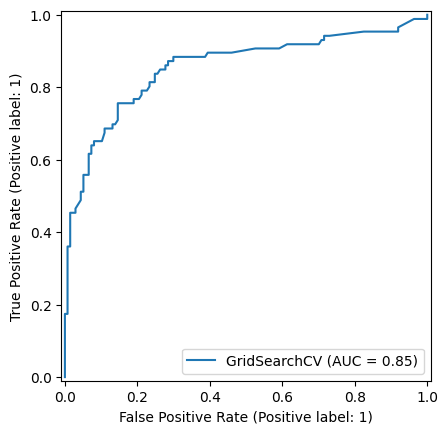

In [ ]:
rfc=RandomForestClassifier()
param_grid = {
    'n_estimators': [100,200,300],       
    'max_depth': [10],
    'min_samples_leaf':[3,5,10],
    'min_samples_split':[3,5,10]}

rfc=GridSearchCV(rfc,param_grid=param_grid,scoring="roc_auc")
models_sweep(rfc,x_train,y_train,x_test,y_test)

In [860]:
rfc.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 200}

**XGBOOST**

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:45] WARNING: C:\actions-runner\_w

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       137
           1       0.79      0.60      0.68        86

    accuracy                           0.78       223
   macro avg       0.79      0.75      0.76       223
weighted avg       0.79      0.78      0.78       223



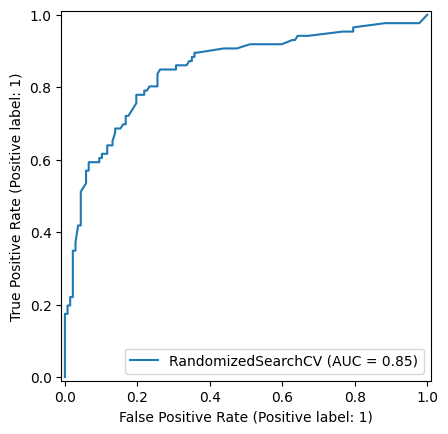

In [929]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    "n_estimators": [100, 200, 400, 800],     
    "max_depth": [3, 4, 5, 6, 8, 10],         
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  
    "subsample": [0.6, 0.8, 1.0],             
    "colsample_bytree": [0.6, 0.8, 1.0],      
    "gamma": [0, 0.1, 0.5, 1],                
    "reg_alpha": [0, 0.01, 0.1, 1],           
    "reg_lambda": [0.5, 1, 2]                 
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,              
    scoring="roc_auc",
    n_iter=50)

models_sweep(random_search_xgb,x_train,y_train,x_test,y_test)

**LIGHTGBM**

[LightGBM] [Info] Number of positive: 256, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


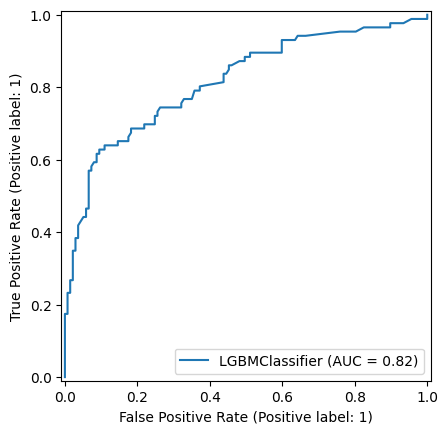

In [863]:
models_sweep(LGBMClassifier(class_weight='balanced'),x_train,y_train,x_test,y_test)

**CATBOOST**

In [864]:
cat_model = CatBoostClassifier(
    verbose=0,
    eval_metric='Accuracy',
    random_state=42)

param_dist = {
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'iterations': [200, 500, 800, 1000],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128, 254], 
    'bagging_temperature': [0, 0.5, 1, 2, 5]}

random_search_cat = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=20,              
    scoring='accuracy',    
    cv=5,                   
    verbose=2,
    random_state=42,
    n_jobs=-1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000276B44C7B60>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 0.5, 1, 2,
                                                                5],
                                        'border_count': [32, 64, 128, 254],
                                        'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': [200, 500, 800, 1000],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2]},
                   random_state=42, scoring='accuracy', verbose=2) results:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
   

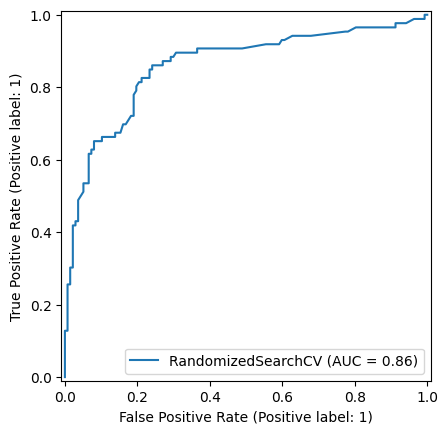

In [865]:
models_sweep(random_search_cat,x_train,y_train,x_test,y_test)

**STACKING**

In [866]:
stc=StackingClassifier(estimators=[('cat',random_search_cat.best_estimator_),('xgb',random_search_xgb.best_estimator_),('gb',gb.best_estimator_),('rfc',rfc.best_estimator_)],final_estimator=lgtry)

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:55:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:55:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:55:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:55:47] WARNING: C:\actions-runner\_w

StackingClassifier(estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x00000276B4E73530>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weight...
                                              n_estimators=400, n_jobs=None,
                                           

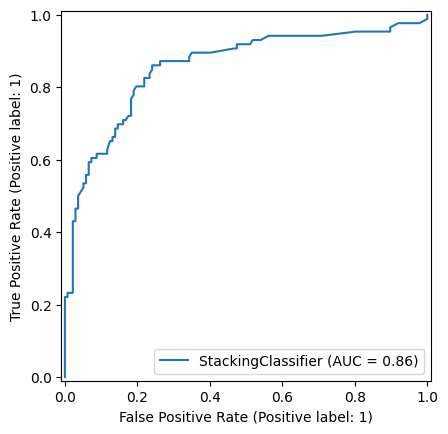

In [867]:
models_sweep(stc,x_train,y_train,x_test,y_test)

**SUPPORT VECTOR CALSSIFIER**

SVC(C=5, class_weight='balanced') results:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       137
           1       0.68      0.81      0.74        86

    accuracy                           0.78       223
   macro avg       0.77      0.79      0.78       223
weighted avg       0.79      0.78      0.78       223



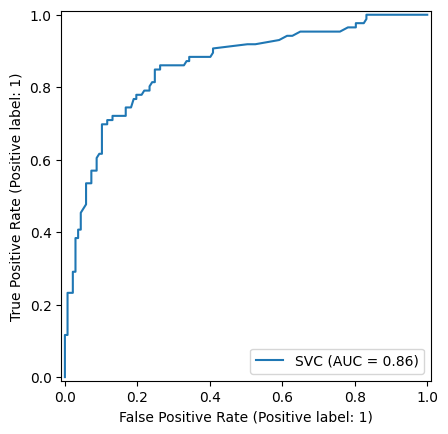

In [925]:
svc=SVC(class_weight='balanced',C=5)
models_sweep(svc,x_train,y_train,x_test,y_test)

**VOTING**

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x000002770060E9F0>),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None

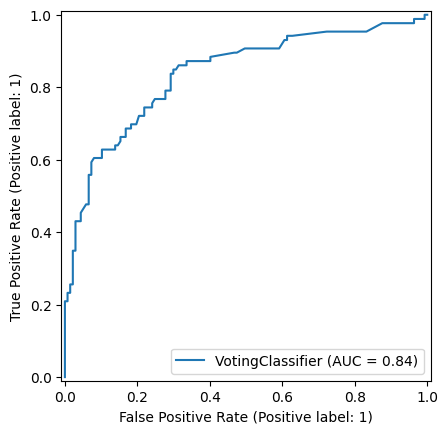

In [940]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('cat',CatBoostClassifier(verbose=0)),('xgb',XGBClassifier()),('gb',GradientBoostingClassifier(verbose=0)),('rfc',RandomForestClassifier(verbose=0))],voting='soft')
models_sweep(vc,x_train,y_train,x_test,y_test)

**SO OVERALL WE CAN SEE THAT ALMOST ALL MODELS GIVE THE SAME PERFORMANCE WHICH IS EXPECTED IN THIS DATASET SINCE ITS A SMALL AND NOISY DATASET WITH MISSING VALUES, AT THE END I USED XGBOOST IN THE MODEL I SUBMITTED TO KAGGLE AND IT SCORED 0.78/1 ACCURACY WHICH IS QUITE GOOD**